### Objectif : référencer quelques sites internets fournissant des jeux de données "datasets" sur les véhicules autonomes

- [x] Extraire un résumé, des informations vers un fichier CSV (datasets.csv)
- [x] Lire et afficher les données du fichier CSV pour vérification
- [x] Extraire des mots-clés, des étiquettes décrivant ces datasets (colonne tags)
- [x] Créer quelques statistiques de base de ces datasets
- [x] Créer une représentation graphique de ces datasets

#### Lire et afficher les données du fichier CSV

In [1]:
# Le fichier datasets.csv est dans le dossier module2/exo4/datasets.csv
# Structure de l'entête/données : name;description;website;tags (avec des points virgules pour les champs)

# https://pandas.pydata.org
# Version 0.22.0 (December 29, 2017) sur ce Jupyter !
import pandas as pd

# print(pd.__version__) 
# pd.show_versions() # Toutes les extensions installées

# Afficher les colonnes principales
datasets = pd.read_csv('datasets.csv', delimiter = ';', usecols=[0,1,2])
datasets

name  \
0        KITTI Vision Benchmark Suite   
1     Audi Autonomous Driving Dataset   
2                 ApolloScape Dataset   
3                       Velodyne SLAM   
4  Daimler Urban Segmentation Dataset   
5                    nuScenes dataset   

                                         description  \
0  We take advantage of our autonomous driving pl...   
1  We have published the Audi Autonomous Driving ...   
2  Trajectory dataset, 3D Perception Lidar Object...   
3  Here, you can find two challenging datasets re...   
4  The Daimler Urban Segmentation Dataset consist...   
5  The nuScenes dataset is a public large-scale d...   

                                             website  
0              http://www.cvlibs.net/datasets/kitti/  
1                 https://www.a2d2.audi/a2d2/en.html  
2                           http://apolloscape.auto/  
3  http://www.mrt.kit.edu/z/publ/download/velodyn...  
4            http://www.6d-vision.com/scene-labeling  
5                          https://www.nuscenes.org/

#### Extraire des mots-clés, des étiquettes décrivant ces datasets

In [2]:
import pandas as pd

# Afficher uniquement les mots-clés 
tags = pd.read_csv('datasets.csv', delimiter = ';', usecols=[3])
tags

tags
0  stereo,flow,odometry,tracking,detection,road,m...
1  semantic,cloud,segmentation,detection,road,map...
2  stereo,flow,semantic,cloud,segmentation,detect...
3                              detection,images,city
4          stereo,labelling,detection,road,maps,city
5                 labelling,detection,road,maps,city

#### Créer quelques statistiques de base de ces datasets

In [3]:
import pandas as pd

# Afficher les mots-clés avec .describe()
tags = pd.read_csv('datasets.csv', delimiter = ';', usecols=[3])
tags.describe()

tags
count                                    6
unique                                   6
top     labelling,detection,road,maps,city
freq                                     1

In [4]:
import pandas as pd
# https://docs.python.org/3/library/re.html
# https://www.w3schools.com/python/python_regex.asp
import re

all_tags = {}
# Extraire les mots-clés
tags = pd.read_csv('datasets.csv', delimiter = ';', usecols=[3])

for t in tags.values:
    # t = numpy.ndarray par défaut
    split = re.split(',',str(t[0]).lower())
    # Comptage des mots-clés
    for s in split:
        if all_tags.get(s):
            all_tags[s] = all_tags[s] + 1
        else:
            all_tags[s] = 1

# Classement par le nom via un dictionnaire
sorted_all_tags = {key: value for key, value in sorted(all_tags.items(), key=lambda item: item[0])}

# Affichage formaté
for sat in sorted_all_tags:
    print("{:<15} : {:<5}".format(sat, sorted_all_tags[sat]))

city            : 6    
cloud           : 2    
detection       : 6    
flow            : 2    
images          : 1    
labelling       : 2    
maps            : 5    
odometry        : 1    
road            : 5    
segmentation    : 2    
semantic        : 2    
stereo          : 3    
tracking        : 1    


#### Créer une représentation graphique de ces datasets

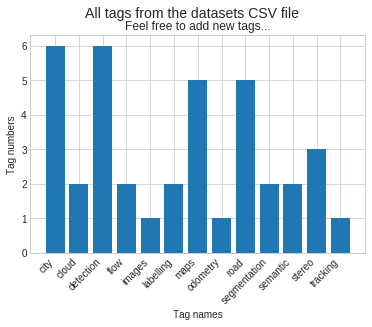

In [6]:
# https://matplotlib.org/api/pyplot_api.html
# Version 2.2.3 sur ce Jupyter !
import matplotlib.pyplot as plt

# Personnalisation du graphique
# https://www.tutorialgateway.org/python-matplotlib-bar-chart/
# https://python-graph-gallery.com/
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
plt.style.use('seaborn-whitegrid')
plt.suptitle('All tags from the datasets CSV file', fontsize=14)
plt.title('Feel free to add new tags...')
plt.xlabel('Tag names')
plt.ylabel('Tag numbers')

plt.bar(range(len(sorted_all_tags)), sorted_all_tags.values(), width=0.8)
plt.xticks(range(len(sorted_all_tags)), list(sorted_all_tags.keys()))
plt.xticks(rotation = 45, horizontalalignment = 'right')

plt.show()